In [164]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pylab as plt
import seaborn as sns
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()

In [165]:
# educ = pd.read_excel('educ2_week16.xlsx',sheet_name='NC')

cur = pd.read_csv('BLS/Current.txt','\t')
hires = pd.read_csv('BLS/Hires.txt','\t')
jobOpenings = pd.read_csv('BLS/JobOpenings.txt','\t')
layOff = pd.read_csv('BLS/LayoffsDischarges.txt','\t')
quits = pd.read_csv('BLS/Quits.txt','\t')
other = pd.read_csv('BLS/OtherSeparations.txt','\t')
totalSep = pd.read_csv('BLS/totalSeparations.txt','\t')

In [166]:
cur.dtypes



series_id                          object
year                                int64
period                             object
       value                      float64
footnote_codes                     object
dtype: object

In [167]:
hires

,series_id,year,period,value,footnote_codes
0,JTS000000000000000HIL,2000,M12,5426.0,NaN
1,JTS000000000000000HIL,2001,M01,5722.0,NaN
2,JTS000000000000000HIL,2001,M02,5303.0,NaN
3,JTS000000000000000HIL,2001,M03,5528.0,NaN
4,JTS000000000000000HIL,2001,M04,5204.0,NaN
...,...,...,...,...,...
37387,JTU929000000000000HIR,2020,M05,1.6,NaN
37388,JTU929000000000000HIR,2020,M06,2.3,NaN
37389,JTU929000000000000HIR,2020,M07,1.8,NaN
37390,JTU929000000000000HIR,2020,M08,1.5,NaN


In [168]:
# cur['current']=cur['value']
cur.columns = cur.columns.str.replace(" ","")
cur.rename(columns ={'value':'current'}, inplace=True)
cur = cur.astype({"year": str, "period": str})
cur.year = cur.year.apply(lambda x: x.lstrip().replace(" ",""))
cur.period = cur.period.apply(lambda x: x.lstrip().replace(" ",""))
cur = cur.drop_duplicates(subset=['year','period'], keep='last')

cur.dtypes

series_id          object
year               object
period             object
current           float64
footnote_codes     object
dtype: object

Text(0.5, 1.0, 'Effect of COVID-19 on current employment')

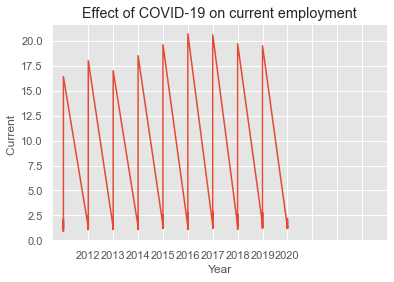

In [169]:
style.use('ggplot')
plt.plot(cur['year'],cur['current'])
plt.xticks(range(1,14))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Current ')
plt.title('Effect of COVID-19 on current employment')

In [170]:
hires.columns = hires.columns.str.replace(" ","")
hires.rename(columns ={'value':'hired'}, inplace=True)
hires = hires.astype({"year": str, "period": str})
hires.year = hires.year.apply(lambda x: x.lstrip().replace(" ",""))
hires.period = hires.period.apply(lambda x: x.lstrip().replace(" ",""))
hires = hires.drop_duplicates(subset=['year','period'], keep='last')

Text(0.5, 1.0, 'Effect of COVID-19 on Hiring')

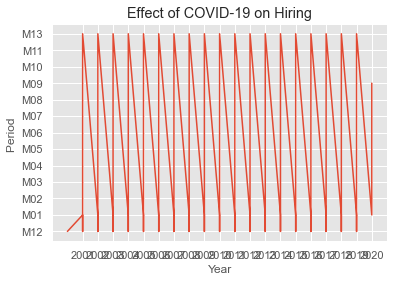

In [171]:
style.use('ggplot')
plt.plot(hires['year'],hires['period'])
plt.xticks(range(1,22))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('Effect of COVID-19 on Hiring')

In [172]:
jobOpenings.columns = jobOpenings.columns.str.replace(" ","")
jobOpenings.rename(columns ={'value':'jobOpening'}, inplace=True)
jobOpenings = jobOpenings.astype({"year": str, "period": str})
jobOpenings.year = jobOpenings.year.apply(lambda x: x.lstrip().replace(" ",""))
jobOpenings.period = jobOpenings.period.apply(lambda x: x.lstrip().replace(" ",""))
jobOpenings = jobOpenings.drop_duplicates(subset=['year','period'], keep='last')

Text(0.5, 1.0, 'Effect of COVID-19 on Job Openings')

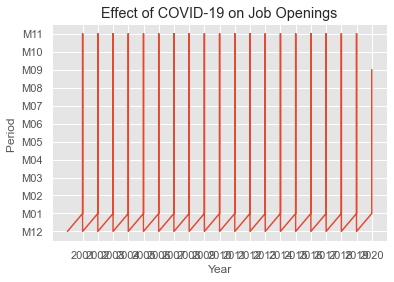

In [173]:
style.use('ggplot')
plt.plot(jobOpenings['year'],jobOpenings['period'])
plt.xticks(range(1,21))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('Effect of COVID-19 on Job Openings')

In [174]:
layOff.columns = layOff.columns.str.replace(" ","")
layOff.rename(columns ={'value':'layOff'}, inplace=True)
layOff = layOff.astype({"year": str, "period": str})
layOff.year = layOff.year.apply(lambda x: x.lstrip().replace(" ",""))
layOff.period = layOff.period.apply(lambda x: x.lstrip().replace(" ",""))
layOff = layOff.drop_duplicates(subset=['year','period'], keep='last')

Text(0.5, 1.0, 'Effect of COVID-19 on LayOffs')

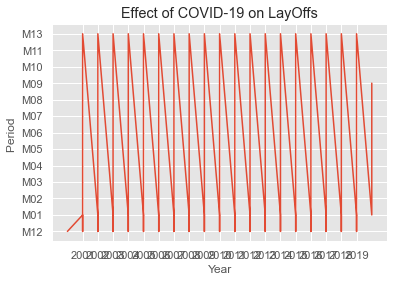

In [175]:
style.use('ggplot')
plt.plot(layOff['year'],layOff['period'])
plt.xticks(range(1,20))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('Effect of COVID-19 on LayOffs')

In [176]:
quits.columns = quits.columns.str.replace(" ","")
quits.rename(columns ={'value':'quits'}, inplace=True)
quits = quits.astype({"year": str, "period": str})
quits.year = quits.year.apply(lambda x: x.lstrip().replace(" ",""))
quits.period = quits.period.apply(lambda x: x.lstrip().replace(" ",""))
quits = quits.drop_duplicates(subset=['year','period'], keep='last')

Text(0.5, 1.0, 'Quits in market due to COVID-19 ')

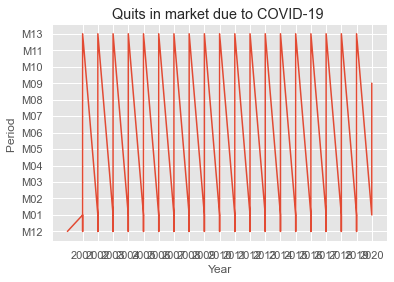

In [177]:
style.use('ggplot')
plt.plot(quits['year'],quits['period'])
plt.xticks(range(1,22))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('Quits in market due to COVID-19 ')

In [178]:
other.columns = other.columns.str.replace(" ","")
other.rename(columns ={'value':'other'}, inplace=True)
other = other.astype({"year": str, "period": str})
other.year = other.year.apply(lambda x: x.lstrip().replace(" ",""))
other.period = other.period.apply(lambda x: x.lstrip().replace(" ",""))
other = other.drop_duplicates(subset=['year','period'], keep='last')

Text(0.5, 1.0, 'People left due to other reasons')

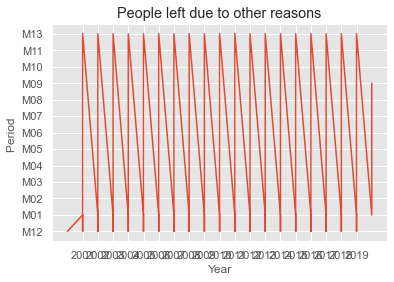

In [179]:
style.use('ggplot')
plt.plot(other['year'],other['period'])
plt.xticks(range(1,20))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('People left due to other reasons')

In [180]:
totalSep.columns = totalSep.columns.str.replace(" ","")
totalSep.rename(columns ={'value':'totalSeperations'}, inplace=True)
totalSep = totalSep.astype({"year": str, "period": str})
totalSep.year = totalSep.year.apply(lambda x: x.lstrip().replace(" ",""))
totalSep.period = totalSep.period.apply(lambda x: x.lstrip().replace(" ",""))
totalSep = totalSep.drop_duplicates(subset=['year','period'], keep='last')

# unimployed = cur[['year','period','current']]

Text(0.5, 1.0, 'People left due to other reasons')

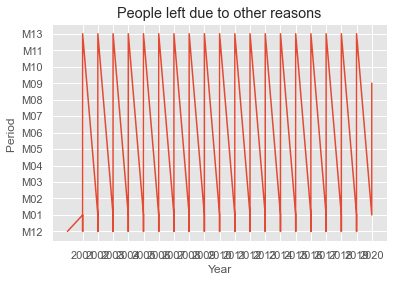

In [181]:
style.use('ggplot')
plt.plot(other['year'],other['period'])
plt.xticks(range(1,22))
plt.xlabel('Year')
plt.grid(True)
plt.ylabel('Period ')
plt.title('People left due to other reasons')

In [182]:
# cur
# totalSep

In [183]:
# unimployed = cur[['year','period','current']]
# cur_hire = cur.append(hires, sort=False)
# cur_hire = pd.merge(cur, hires[['year','period','hired']], on=['year','period'], right_index=True,
#       how='left', sort=False)
cur_hire = pd.merge(cur[['year','period','current']], hires[['year','period','hired']], on=['year','period'], how='outer', validate="one_to_one")
# cur_hire = cur.join(hires, on=['year','period'])
cur_hire

,year,period,current,hired
0,2011,M01,1.1,0.9
1,2011,M02,0.9,0.8
2,2011,M03,1.0,0.9
3,2011,M04,1.1,1.2
4,2011,M05,1.2,1.8
...,...,...,...,...
252,2010,M09,NaN,1.0
253,2010,M10,NaN,1.0
254,2010,M11,NaN,1.0
255,2010,M12,NaN,0.8


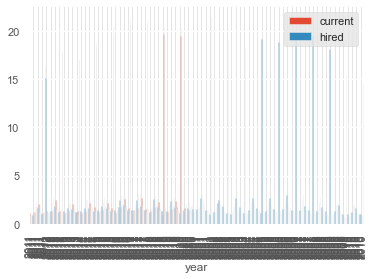

In [184]:
cur_hire.plot(x="year", y=["current", "hired"], kind="bar")
plt.show()

In [185]:
hires.describe(include="all")

,series_id,year,period,hired,footnote_codes
count,257,257,257,257.000000,1
unique,1,21,13,NaN,1
top,JTU929000000000000HIR,2003,M06,NaN,P
freq,257,13,20,NaN,1
mean,NaN,NaN,NaN,2.836576,NaN
std,NaN,NaN,NaN,4.578472,NaN
min,NaN,NaN,NaN,0.700000,NaN
25%,NaN,NaN,NaN,1.200000,NaN
50%,NaN,NaN,NaN,1.500000,NaN
75%,NaN,NaN,NaN,2.000000,NaN


In [186]:
job_lay = pd.merge(jobOpenings[['year','period','jobOpening']], layOff[['year','period','layOff']], on=['year','period'], how='outer', validate="one_to_one")

In [187]:
# mask = unimployed['year']==hires['year'] and unimployed['period']==hires['period']

quit_other = pd.merge(quits[['year','period','quits']], other[['year','period','other']], on=['year','period'], how='outer', validate="one_to_one")

In [188]:


quit_other_total = pd.merge(quit_other[['year','period','quits','other']], totalSep[['year','period','totalSeperations']], on=['year','period'], how='outer', validate="one_to_one")

In [189]:
one =  pd.merge(cur_hire[['year','period','current','hired']], job_lay[['year','period','jobOpening','layOff']], on=['year','period'], how='outer', validate="one_to_one")

final_unimployment = pd.merge(one[['year','period','jobOpening','current','hired','layOff']], quit_other_total[['year','period','quits','other','totalSeperations']], on=['year','period'], how='outer', validate="one_to_one")

In [190]:
# final_unimployment

# job_lay
# quit_other
# quit_other_total
# one

final_unimployment[final_unimployment['year']=='2020']



,year,period,jobOpening,current,hired,layOff,quits,other,totalSeperations
117,2020,M01,4.1,1.3,1.4,0.2,0.7,0.3,1.3
118,2020,M02,4.1,1.2,1.4,0.2,0.7,0.3,1.2
119,2020,M03,4.0,1.6,1.4,0.6,0.7,0.2,1.6
120,2020,M04,3.8,2.2,0.9,1.3,0.6,0.3,2.2
121,2020,M05,3.9,1.2,1.6,0.5,0.5,0.2,1.2
122,2020,M06,3.8,1.4,2.3,0.3,0.8,0.3,1.4
123,2020,M07,3.8,1.3,1.8,0.2,0.8,0.3,1.3
124,2020,M08,4.2,1.8,1.5,0.5,1.0,0.3,1.8
125,2020,M09,4.2,1.9,1.5,0.8,0.8,0.2,1.9


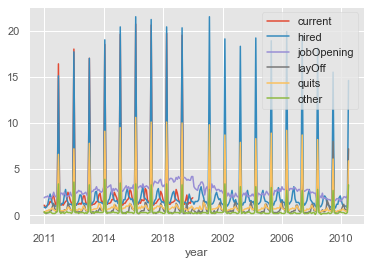

In [193]:
final_unimployment.plot(x="year", y=["current", "hired","jobOpening","layOff","quits","other"], kind="line")
plt.show()